Neural Networks:



In [1]:
import matplotlib.pyplot as plt

In [2]:
# a simple neural network with one hidden layer: 2 inputs, 3 hidden neurons, 1 output neuron

import pandas as pd
import numpy as np

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize the weights
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        
        # Initialize the biases
        self.biases1 = np.zeros((1, self.hidden_size))
        self.biases2 = np.zeros((1, self.output_size))
        
    def forward(self, X):
        # Calculate the hidden layer output
        self.hidden_output = sigmoid(np.dot(X, self.weights1) + self.biases1)
        
        # Calculate the output layer output
        self.output = sigmoid(np.dot(self.hidden_output, self.weights2) + self.biases2)
        
        return self.output
    
    def backward(self, X, y, learning_rate):
        # Calculate the gradients
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        
        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update the weights and biases
        self.weights2 += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.weights1 += np.dot(X.T, hidden_delta) * learning_rate
        
        self.biases2 += np.sum(output_delta, axis=0) * learning_rate
        self.biases1 += np.sum(hidden_delta, axis=0) * learning_rate
        
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
    def predict(self, X):
        return self.forward(X)




Try it on the UCI data:

digits dataset, recognizing handwritten digits.
Using the code given in the UCI repo to import the dataset.

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
#print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [4]:
optical_recognition_of_handwritten_digits.data

{'ids': None,
 'features':       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
 0              0           1           6          15          12           1   
 1              0           0          10          16           6           0   
 2              0           0           8          15          16          13   
 3              0           0           0           3          11          16   
 4              0           0           5          14           4           0   
 ...          ...         ...         ...         ...         ...         ...   
 5615           0           0           4          10          13           6   
 5616           0           0           6          16          13          11   
 5617           0           0           1          11          15           1   
 5618           0           0           2          10           7           0   
 5619           0           0          10          14           8           1   
 


Now, show the first picture:

In [5]:
optical_recognition_of_handwritten_digits.data['features'].loc[0,:]

Attribute1      0
Attribute2      1
Attribute3      6
Attribute4     15
Attribute5     12
               ..
Attribute60    14
Attribute61     7
Attribute62     1
Attribute63     0
Attribute64     0
Name: 0, Length: 64, dtype: int64

In [6]:
pic_1st_array = optical_recognition_of_handwritten_digits.data['features'].loc[0,:].to_numpy()

# Reshape the array into an 8x8 matrix
matrix_8x8_first_pic = pic_1st_array.reshape(8, 8)

<Figure size 640x480 with 0 Axes>

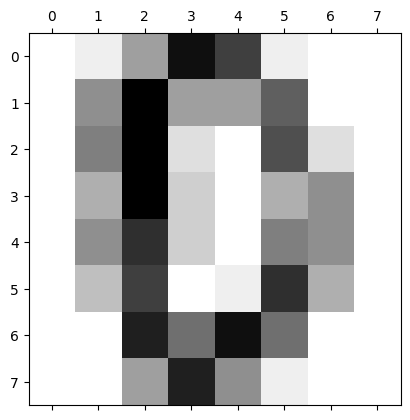

In [7]:
plt.gray()
plt.matshow(matrix_8x8_first_pic, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It seems the first phote is a 0.

check out the Target:

In [8]:
optical_recognition_of_handwritten_digits.data['targets'].loc[0,:]

class    0
Name: 0, dtype: int64

It is indeed 0! 

Now test the simple three layer n-n on it.

In [48]:
# Create a neural network instance
nn = NeuralNetwork(input_size=64, hidden_size=3, output_size=1)


In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
type(y)

pandas.core.frame.DataFrame

Now convert to numpy:

In [56]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

    Input Layer: The size of the input layer should match the number of features in your dataset. So, for your case, you would have 64 neurons in the input layer.

    Hidden Layer: The number of neurons in the hidden layer is a key parameter to tune. A common practice is to start with a number between the size of the input layer and the size of the output layer. Since you have 64 input features, you might start with a hidden layer size that is a fraction or multiple of 64. A typical starting point could be in the range of 32 to 128 neurons. The exact number can be determined through experimentation: start with a lower number to avoid overfitting and increase it if the network's performance is not satisfactory.

    Output Layer: The size of the output layer depends on the type of task. For a regression task, it's usually 1 neuron (for a single continuous output). For a classification task, it's often the number of classes (for binary classification, it's 1 neuron; for multi-class classification, it's equal to the number of classes).

In [66]:
# Create a neural network instance
#nn = NeuralNetwork(input_size=64, hidden_size=3, output_size=1)
# Create a neural network instance


nn = NeuralNetwork(input_size=64, hidden_size=128, output_size=1)
# Train the neural network
nn.train(X_arr, y_arr, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print(predictions)

/tmp/ipykernel_20191/4223900226.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [67]:
predictions[0]

array([1.])

3 layer neuron-network accuracy is:

In [68]:
# print the accuracy
print(np.mean(predictions == y))

0.10160142348754449


Basically, it predicts everything as 1.


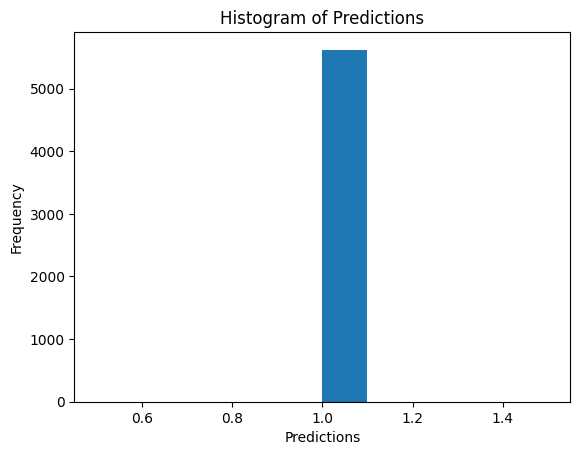

In [69]:
import matplotlib.pyplot as plt

# Create a histogram of predictions
plt.hist(predictions, bins=10)
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')
plt.show()


Porperly import tensorflow:

In [11]:
import tensorflow as tf


In [21]:
#from tensorflow.keras.models import Sequential
#from tensorflow.layers import Conv2D, MaxPooling2D, Flatten, Dense


""" 
Import the modules from Keras in this manner:

tf.keras.models.Sequential
tf.layers.Conv2D
tf.layers.MaxPooling2D
tf.layers.Flatten
tf.layers.Dense

"""
# Create a CNN model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=(8, 8, 1)))
model.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=(8,8, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))  # or softmax for multi-class

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Load the digits dataset
digits = datasets.load_digits(n_class=10)

# Data and labels
X = digits.images
y = digits.target

# Normalizing the pixel values
X = X / 16.0

# Reshaping the data to fit the model
X = X.reshape(-1, 8, 8, 1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Now you can fit your model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/10
45/45 [==============================] - 1s 14ms/step - loss: 2.2450 - accuracy: 0.2220
Epoch 2/10
45/45 [==============================] - 1s 15ms/step - loss: 2.0323 - accuracy: 0.5101
Epoch 3/10
45/45 [==============================] - 1s 17ms/step - loss: 1.6713 - accuracy: 0.6611
Epoch 4/10
45/45 [==============================] - 1s 19ms/step - loss: 1.2186 - accuracy: 0.7989
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.8550 - accuracy: 0.8664
Epoch 6/10
45/45 [==============================] - 1s 18ms/step - loss: 0.6346 - accuracy: 0.8914
Epoch 7/10
45/45 [==============================] - 1s 19ms/step - loss: 0.5000 - accuracy: 0.9068
Epoch 8/10
45/45 [==============================] - 1s 14ms/step - loss: 0.4155 - accuracy: 0.9193
Epoch 9/10
45/45 [==============================] - 1s 15ms/step - loss: 0.3576 - accuracy: 0.9283
Epoch 10/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3347 - accuracy: 0.9167


[0.33473771810531616, 0.9166666865348816]

The following will train your model and also validate it on 20% of the training data (you can adjust the validation_split as needed).

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 0s 13ms/step - loss: 0.2935 - accuracy: 0.9321 - val_loss: 0.2479 - val_accuracy: 0.9514
Epoch 2/10
36/36 [==============================] - 0s 13ms/step - loss: 0.2729 - accuracy: 0.9295 - val_loss: 0.2319 - val_accuracy: 0.9340
Epoch 3/10
36/36 [==============================] - 0s 14ms/step - loss: 0.2585 - accuracy: 0.9304 - val_loss: 0.2102 - val_accuracy: 0.9583
Epoch 4/10
36/36 [==============================] - 1s 17ms/step - loss: 0.2357 - accuracy: 0.9365 - val_loss: 0.2041 - val_accuracy: 0.9479
Epoch 5/10
36/36 [==============================] - 0s 10ms/step - loss: 0.2207 - accuracy: 0.9443 - val_loss: 0.1910 - val_accuracy: 0.9549
Epoch 6/10
36/36 [==============================] - 0s 12ms/step - loss: 0.2109 - accuracy: 0.9452 - val_loss: 0.1737 - val_accuracy: 0.9653
Epoch 7/10
36/36 [==============================] - 0s 11ms/step - loss: 0.1980 - accuracy: 0.9469 - val_loss: 0.1734 - val_accuracy: 0.9583
Epoch 8/10
36

These plots are helpful for understanding how your model is learning and to check for issues like overfitting (where the model performs well on the training data but poorly on unseen data). If you see the validation loss increasing while the training loss decreases, it's a sign of overfitting. In that case, you might want to consider techniques like adding dropout, using data augmentation, or stopping the training early (early stopping).

__Model Accuracy:__ This plot shows the accuracy of the model on the training and validation datasets over each epoch.

__Model Loss:__ This plot shows the loss of the model on the training and validation datasets over each epoch.

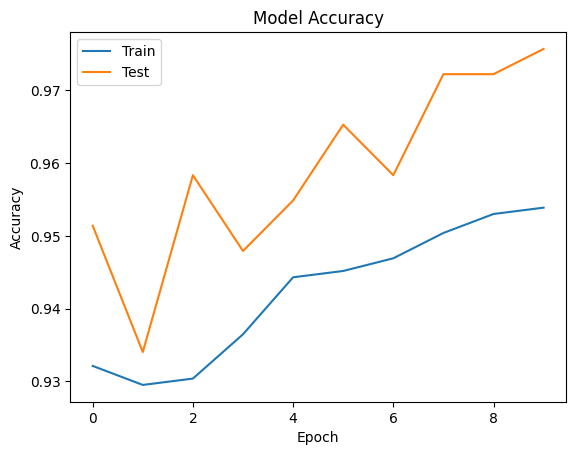

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

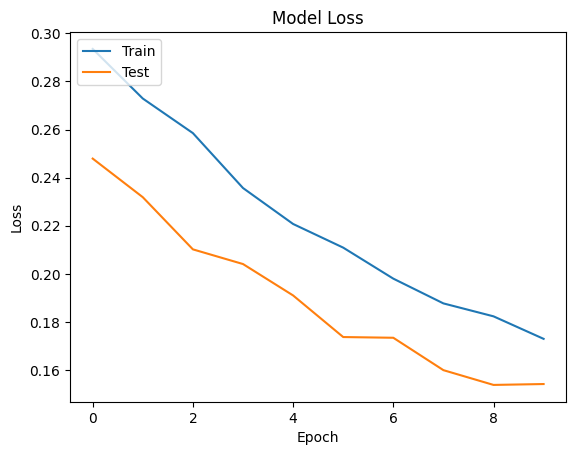

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confusion Matrix:

This is a confusion matrix plot using Seaborn's heatmap function. This plot visually represents the performance of your classification model. Let's interpret how to read this plot:
Understanding the Plot

    Axis Labels:
        Actual: This axis represents the true classes of the data points.
        Predicted: This axis shows the classes that your model predicted.

        Cells:
        Each cell in the grid corresponds to a specific pair of Actual (row) and Predicted (column) class.
        The value in each cell represents the number of instances of the Actual class that were predicted as the Predicted class.

    Diagonal Cells:
        These cells (from the top left to the bottom right) represent correct classifications, where the Actual class matches the Predicted class.
        High values in these diagonal cells indicate a large number of correct predictions for that class.

    Off-Diagonal Cells:
        These cells represent misclassifications.
        A high value in an off-diagonal cell indicates that many instances of one class (the row) are being misclassified as another class (the column).

Interpretation

    Accuracy per Class:
        Look at the diagonal cells. The higher the value, the more accurately that particular class was predicted.
    Common Misclassifications:
        Look for rows or columns with high values outside the diagonal. These indicate classes that are often confused with one another.
    Class Bias:
        If one or more classes have significantly higher values in their diagonal cells compared to others, it might indicate a bias in the model towards these classes. It could also reflect a class imbalance in the dataset.
    Overall Performance:
        A confusion matrix with high values along the diagonal and low values elsewhere suggests good overall performance.
        Conversely, a matrix with many high off-diagonal values indicates a model struggling to correctly classify those instances.

Example

If you’re working on digit classification (0-9), and you notice:

    High values in the diagonal cell for the row of digit '8' indicates the model predicts '8's accurately.
    A high value in the cell at the intersection of the actual '3' row and predicted '5' column might suggest the model often confuses '3's for '5's.

Visual Cues

    Color Coding: The heatmap usually uses color intensity to represent the magnitude of values. Darker or more intense colors typically indicate higher values.
    Annotations: Numbers inside the cells tell you the exact count of predictions for that Actual-Predicted pair.

This visual representation quickly helps identify which parts of the classification task the model is handling well and which parts need improvement. It's particularly useful for diagnosing classification models in multiclass problems.

12/12 [==============================] - 0s 6ms/step


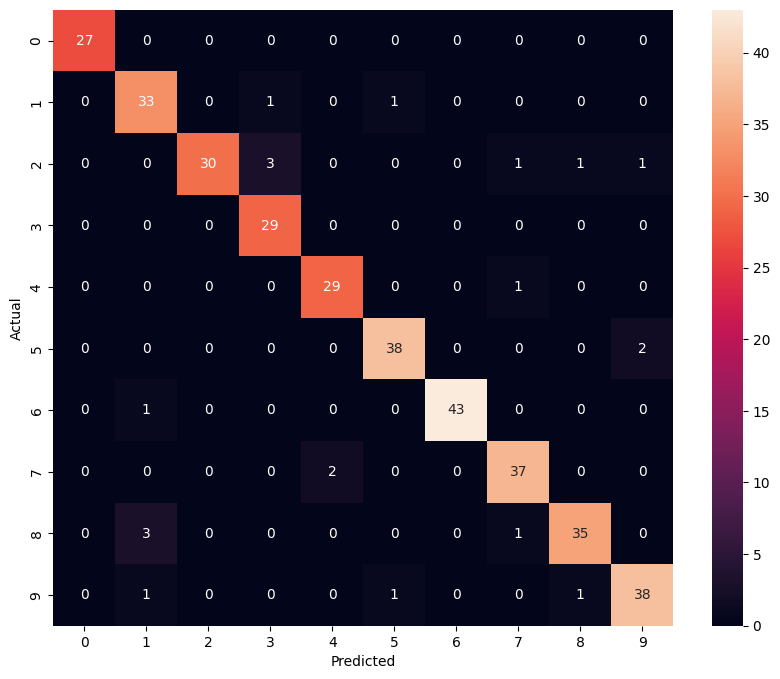

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Normalize the confusion matrix:

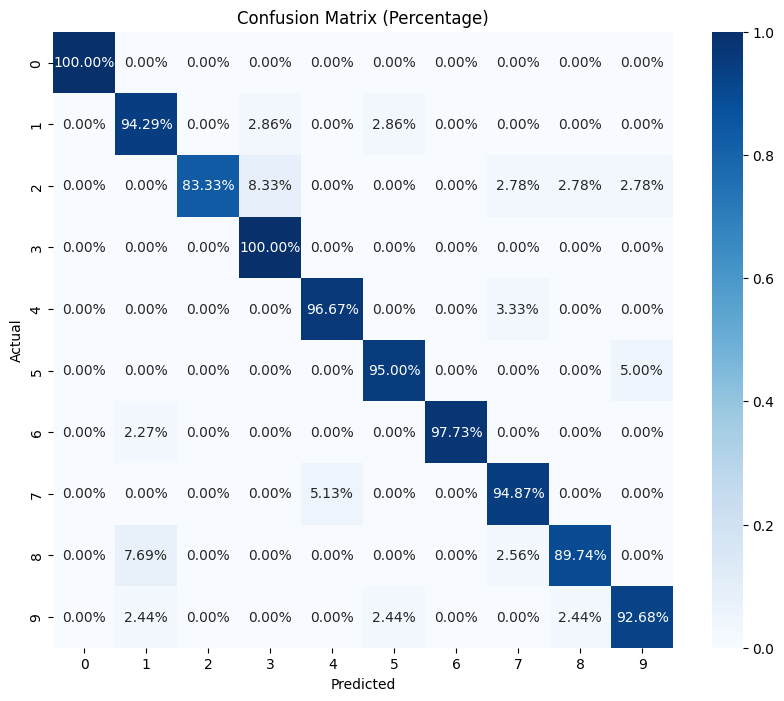

In [38]:
# Normalize the confusion matrix
confusion_mtx_percentage = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx_percentage, annot=True, fmt=".2%", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentage)')
plt.show()

Besides the basic accuracy and loss plots, there are several other types of visualizations you can use to gain deeper insights into your machine learning model's performance and behavior. Here are a few suggestions:

    Confusion Matrix: A confusion matrix is a useful tool for understanding the classification performance of a model. It shows the number of correct and incorrect predictions made by the model for each class.

    ROC Curve and AUC: For binary classification problems, Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) can be used to evaluate the model's performance across different classification thresholds.

    Precision-Recall Curve: This is another useful plot for binary classification problems, especially when the classes are imbalanced. It shows the trade-off between precision and recall for different thresholds.

    Feature Maps: If you're working with a CNN, visualizing the feature maps can be insightful. It helps in understanding what features your model is learning from the images.

    Filter Visualization: Another technique for CNNs is to visualize the filters/weights of the convolutional layers to see what patterns the model is detecting.

    Learning Curves: These are plots of the model's learning progress over time, such as how the error decreases as the number of training samples increases.

    t-SNE Visualization: t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for visualizing high-dimensional data (like the activations of a neural network) in two or three dimensions.

Let's demonstrate how to create a confusion matrix and an ROC curve for your model:

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 5ms/step


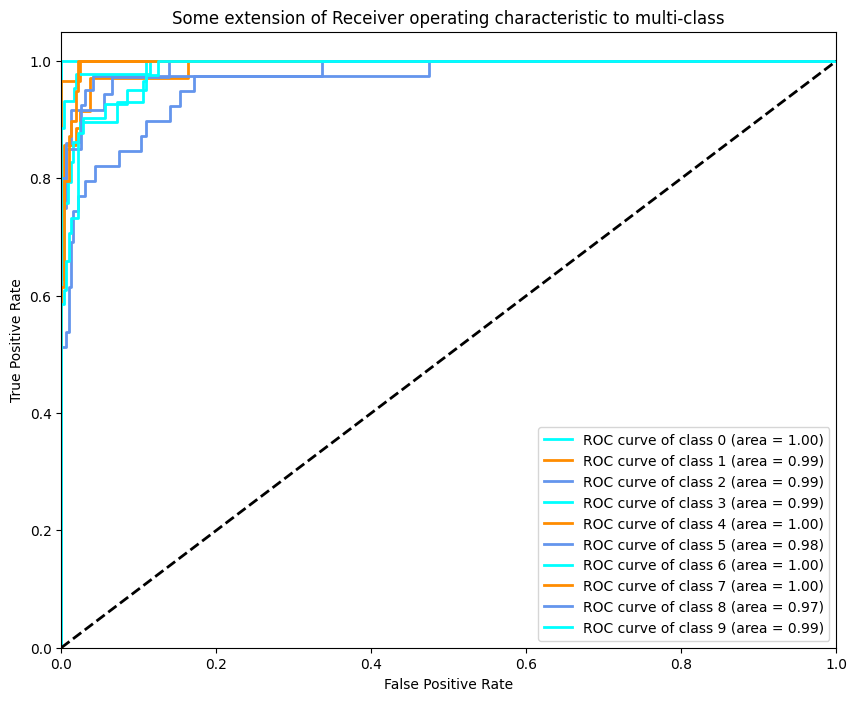

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the labels for the multiclass case
y_test_binarized = label_binarize(y_test, classes=np.arange(10))
y_pred_binarized = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve

For multiclass classification, you can plot a Precision-Recall curve for each class or compute the average. First, you need predictions from your model:

12/12 [==============================] - 0s 3ms/step


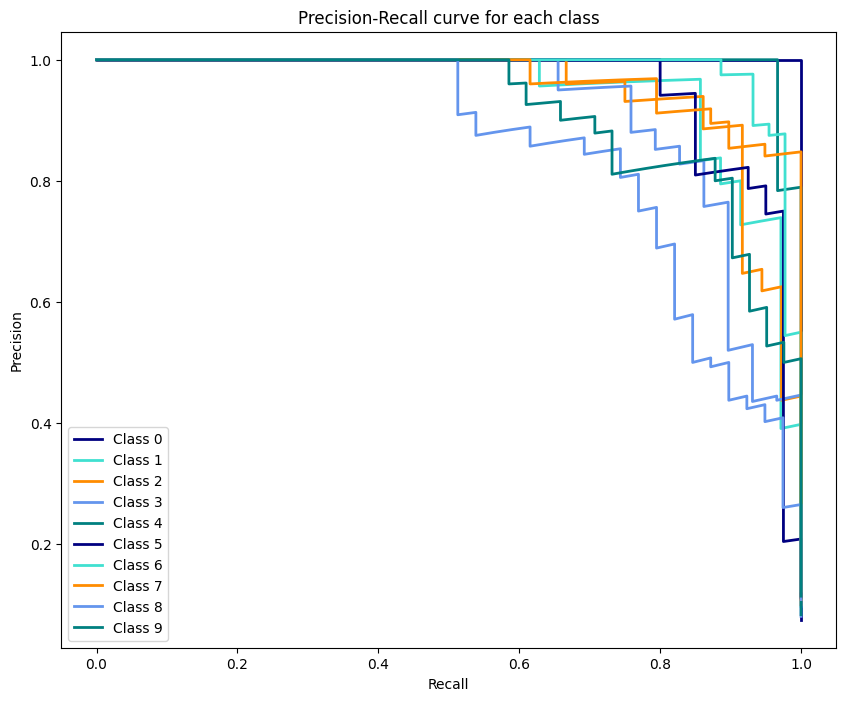

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.arange(10))

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Plotting Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(10), colors):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label='Class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend(loc="lower left")
plt.show()


Interpreting feature maps and filter visualizations in a Convolutional Neural Network (CNN) can provide insights into how the network processes and understands images. Here’s how to interpret them:

### 1. Feature Maps

Feature maps are the outputs of the convolutional layers in a CNN. Each feature map is the result of applying a filter (or kernel) to the input image (or to the output of the previous layer).

- **Early Layers**: Feature maps in the initial layers of the network often capture basic features such as edges, colors, and textures. In your case, for handwritten digit recognition, these feature maps might highlight the edges and curves of the digits.
  
- **Later Layers**: As you move deeper into the network, feature maps start representing more abstract and complex features. These might be specific patterns or parts of digits, like loops in 8 or the cross in 4.

- **Interpretation**: When you visualize these maps, look for recognizable patterns. Clear, distinct patterns in the feature maps can indicate that the network is effectively learning useful features from the data. Blurry or indistinct feature maps might suggest that the layer is not contributing much to the model's learning.

### 2. Filter Visualization

Filters in a convolutional layer are what the network uses to extract features. By visualizing these filters, you can attempt to understand what kind of features the network is learning.

- **Simple Patterns**: In the first layer, filters often look like simple edge detectors, capturing orientations and color gradients.

- **Complex Patterns**: In deeper layers (which might be less interpretable in small networks like one for 8x8 images), filters represent more complex patterns, but these can be quite abstract and harder to interpret directly.

- **Interpretation**: If early filters appear to be random noise or are all very similar, it might indicate issues with training. Ideally, early filters should capture a variety of patterns and directions. For more complex models, filters in deeper layers may be harder to interpret due to the abstract nature of the features they represent.

### General Tips for Interpretation

1. **Training Quality**: Good feature maps and filters often indicate that your model is learning effectively. However, it's crucial to pair this qualitative assessment with quantitative metrics like accuracy or loss.

2. **Model Complexity**: In simple models (like one used for 8x8 images), deeper insights might be limited due to the model's simplicity. As models get more complex, so do the feature maps and filters.

3. **Complementary Tools**: Use feature map and filter visualizations alongside other analysis tools like confusion matrices or precision-recall curves for a more comprehensive understanding of your model.

4. **Experimentation**: Sometimes, changing model architectures or training strategies can lead to different feature map and filter patterns. Experimenting with these can offer further insights into how different approaches affect what the model learns.

Remember, while these visualizations are insightful, they often require experience and intuition to interpret correctly. They are more of an art than a science and should be used as part of a broader toolkit for understanding and improving your models.

Feature Maps

To visualize feature maps, you need to access the outputs of different layers of your CNN. This requires a bit of manipulation using Keras functional API:

1/1 [==============================] - 0s 70ms/step


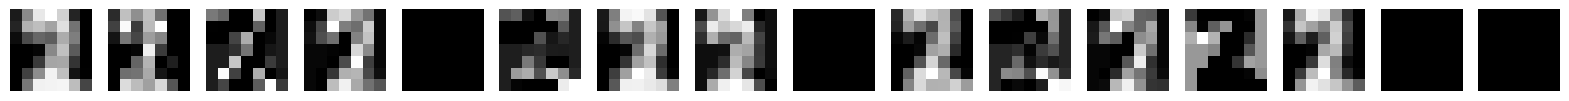

In [37]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Choose a sample image from your dataset
sample_image = X_test[0].reshape(1, 8, 8, 1)

# Creating a model to visualize feature maps
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
activations = activation_model.predict(sample_image)

# Plotting feature maps
for i, activation in enumerate(activations):
    plt.figure(figsize=(20, 3))
    num_features = activation.shape[-1]
    size = activation.shape[0]
    for j in range(num_features):
        plt.subplot(2, num_features, j+1)
        plt.imshow(activation[:, :, j], cmap='gray')
        plt.axis('off')
    plt.show()


Filter Visualization

Visualizing filters requires extracting the weights from the convolutional layers:

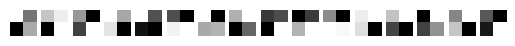

In [34]:
# Accessing the weights of the first conv layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plotting the filters
n_filters = filters.shape[-1]
for i in range(n_filters):
    filter = filters[:, :, :, i]
    plt.subplot(2, n_filters, i+1)
    plt.imshow(filter[:, :, 0], cmap='gray')  # Adjust color map for better visualization
    plt.axis('off')
plt.show()


Learning Curves

These are typically plots of training loss and accuracy:

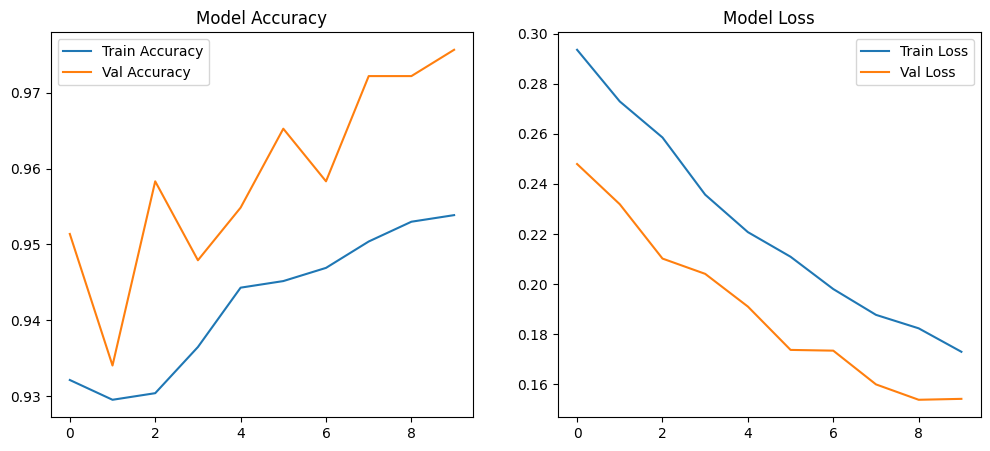

In [35]:
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


t-SNE Visualization

t-SNE is a tool to visualize high-dimensional data. It can be computationally intensive, so be cautious with large datasets.

12/12 [==============================] - 0s 5ms/step
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 360 samples in 0.001s...
[t-SNE] Computed neighbors for 360 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 360 / 360
[t-SNE] Mean sigma: 2.553560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.997681
[t-SNE] KL divergence after 300 iterations: 0.525689


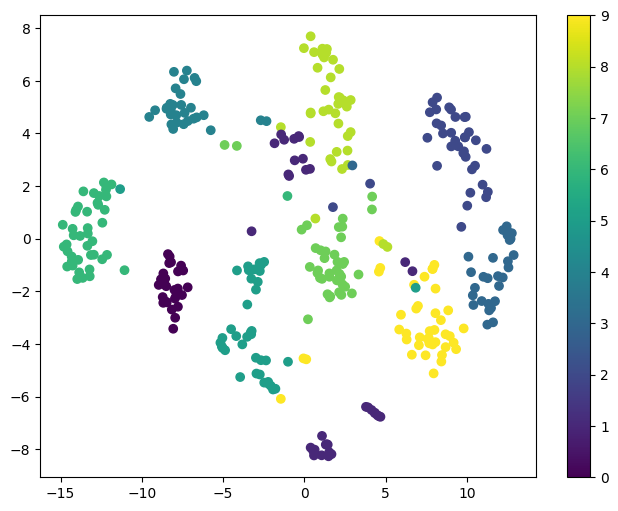

In [36]:
from sklearn.manifold import TSNE

# Extracting features from an intermediate layer
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(index=3).output)
intermediate_output = intermediate_layer_model.predict(X_test)

# Running t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(intermediate_output)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.show()


The output you're seeing is from the t-SNE (t-Distributed Stochastic Neighbor Embedding) process. t-SNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It's commonly used in machine learning to visualize the patterns in the data. Let's interpret each part of the output:

    12/12 [==============================] - 0s 5ms/step: This line is likely from a previous step (not t-SNE), perhaps from evaluating your model. It indicates that there were 12 batches (or steps) processed, each taking an average of 5 milliseconds.

    [t-SNE] Computing 121 nearest neighbors...: t-SNE starts by finding a fixed number (121 in your case) of nearest neighbors for each point. This is part of building the probability distributions used in t-SNE.

    [t-SNE] Indexed 360 samples in 0.001s...: This indicates that t-SNE has processed 360 samples (your data points), and this indexing step took 0.001 seconds.

    [t-SNE] Computed neighbors for 360 samples in 0.065s...: Here, it's stating that it calculated the nearest neighbors for all 360 samples in 0.065 seconds.

    [t-SNE] Computed conditional probabilities for sample 360 / 360: t-SNE computes conditional probabilities that represent similarities between points. This line indicates that this computation has been completed for all 360 samples.

    [t-SNE] Mean sigma: 2.553560: Sigma here refers to the Gaussian kernel's variance used in the t-SNE algorithm to convert distances into probabilities. The mean sigma value is an average measure of how spread out these distances were in the original space. A higher sigma might indicate more spread in the high-dimensional space.

    [t-SNE] KL divergence after 250 iterations with early exaggeration: 54.997681: After 250 iterations (with early exaggeration, a technique used to help t-SNE get a more globally optimized structure), the Kullback-Leibler (KL) divergence is around 55. KL divergence is a measure of how well the probability distribution over the embedded points (low-dimensional) matches the distribution over the original points (high-dimensional). The goal is to minimize this divergence.

    [t-SNE] KL divergence after 300 iterations: 0.525689: After 300 iterations, the KL divergence has been significantly reduced to around 0.53. A lower KL divergence indicates that the low-dimensional representation more accurately reflects the high-dimensional data.

In summary, these outputs show the progress and effectiveness of the t-SNE algorithm in reducing the dimensions of your data while preserving the relative distances between points. The final KL divergence value gives you an idea of the quality of the embedding; lower values are generally better, but interpreting this value can be complex and depends on the specifics of the dataset and the t-SNE parameters used.

# Superseded Code Blocks

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

12/12 [==============================] - 0s 7ms/step - loss: 0.2120 - accuracy: 0.9417
Test Accuracy: 0.9416666626930237


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
X_train = X_train.reshape(-1, 8, 8, 1)

model.fit(X_train, y_train, epochs=10, batch_size=32)  # You can adjust epochs and batch_size


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

36/36 [==============================] - 0s 3ms/step - loss: -74871768.0000 - accuracy: 0.0907
Test Accuracy: 0.09074733406305313


Oops!, seems to be very inaccurate!